This notebook is designed to introduce the basic functionality of some of the more important data science/analysis packages for Atmospheric Science

In [44]:
#### IMPORTS GO HERE ####
# STANDARD LIBRARIES #
import timeit # This is used to time code we saw it last time
import datetime as dt # This is used to handle dates
# PUBLIC LIBRARIES #
import cartopy.crs as ccrs # This lets us easily work with map projections
import cartopy.feature as cfeature # This adds political/geographic features to maps
import matplotlib.pyplot as plt # This lets us make plots easily
import matplotlib.ticker as mticker # Extends plotting functionality
import numpy as np # This lets us have access to numpy arrays and other tools
import pandas as pd # This gives us access to powerful data manipulation tools
import xarray as xr # Also gives us access to powerful data manipulation tools

The ability to manipulate and visualize data is incredibly important in science. We're going to introduce some of the packages most commonly used for this.

NumPy we already saw some of in the last workshop the packages we're looking at today are actually built around/on top of NumPy.

We're going to look at four packages:
- Pandas
- XArray
- Matplotlib
- Cartopy

We're going to look at pandas first. The content of this tutorial is based partially on the official pandas tutorial.

Pandas is based around two different data structures: 1.) The series, 2.) The dataframe

In [45]:
# A series in pandas is type of 1-D array, similar to numpy, except with a few interesting
# extensions in functionality
ex_series = pd.Series(np.random.random(10)*10)
# When we print out a Pandas series we see not only the values of the series
# but also the index used to access data within the array
# This index is customizable and we will explore that feature later
print(ex_series)

0    5.900885
1    2.470250
2    5.254989
3    9.399013
4    0.598564
5    5.742406
6    2.076084
7    8.488618
8    3.083447
9    2.062759
dtype: float64


In [46]:
# We can access element of a pandas series using the index
print(f'Indexing a series example: {ex_series[0]:.3f}, {ex_series[9]:.3f}')
# We can't however use values not in the index to access values in a series
# Uncomment the line below to get an error
# print(ex_series[-1])
# If we want to make use of python's indexing we have to use .iloc[]
print(f'Indexing a series with iloc example:\n{ex_series.iloc[-3:]}')

Indexing a series example: 5.901, 2.063
Indexing a series with iloc example:
7    8.488618
8    3.083447
9    2.062759
dtype: float64


In [47]:
# We can also access pieces of a series using boolean operators
ex_series_bool_ops = pd.Series(np.arange(0,25,1))
print(f'Using Boolean Operators on a series example:\n{ex_series_bool_ops[ex_series_bool_ops > 20]}')

Using Boolean Operators on a series example:
21    21
22    22
23    23
24    24
dtype: int64


In [48]:
# We can also apply mathematical operations onto a series
print(f'Applying math to a series:\n{np.sqrt(ex_series_bool_ops).iloc[-5:]}')
# This however doesn't change the underlying series, we would need to
# either save the modified series to a new variable or overwrite our previous one
print(f'The original series is still there:\n{ex_series.iloc[-5:]}')

Applying math to a series:
20    4.472136
21    4.582576
22    4.690416
23    4.795832
24    4.898979
dtype: float64
The original series is still there:
5    5.742406
6    2.076084
7    8.488618
8    3.083447
9    2.062759
dtype: float64


In [49]:
# The index of a Pandas Series can be set to lots of things, one common index is datetime objects
# The line below generates a series with values corresponding to a week of dates
ex_series_cust_index = pd.Series(np.array([85,96,94,92,96,98,88]),index = np.array([dt.datetime(2024,8,1)+dt.timedelta(days = i) for i in range(7)]))
print(ex_series_cust_index)
# We can either access the values in this series by the index we just created (datetime objects)
# or with .iloc
print(f'Accessing custom index via index: {ex_series_cust_index[dt.datetime(2024,8,4)]}')
print(f'Accessing custom index via iloc: {ex_series_cust_index.iloc[-1]}')

2024-08-01    85
2024-08-02    96
2024-08-03    94
2024-08-04    92
2024-08-05    96
2024-08-06    98
2024-08-07    88
dtype: int64
Accessing custom index via index: 92
Accessing custom index via iloc: 88


In [65]:
# Pandas Dataframes are a collection of multiple Pandas Series with a common index
# This example generates a data frame via combining multiple series, numpy arrays, or lists
# In a later workshop we'll explore generating a Dataframe from a file
df_size = 5000
df_series_a = pd.Series(np.random.normal(65,10,df_size))
df_series_b = pd.Series(np.random.uniform(0,100,df_size))
# When generating a Dataframe in this way the preferred way is to call the pd.DataFrame()
# function on a dictionary. This let's us access items in the dataframe via the key from
# the dictionary as well as the index (via .iloc)
example_df = pd.DataFrame({'Temp':df_series_a,'RH':df_series_b})
print(example_df[:10])

        Temp         RH
0  66.155007  69.655011
1  68.968101   6.468613
2  72.003253  33.122990
3  82.329555  54.409836
4  67.111340  44.091805
5  68.402205  42.632054
6  60.938441  31.063482
7  64.282547  45.693040
8  81.039025   8.377995
9  69.995791  78.529929


In [66]:
np.random.normal()

0.5683231168112528

In [67]:
print(f'Accessing dataframe values via Column Name:\n{example_df['Temp']}')

Accessing dataframe values via Column Name:
0       66.155007
1       68.968101
2       72.003253
3       82.329555
4       67.111340
          ...    
4995    64.682921
4996    80.177492
4997    52.046836
4998    54.980326
4999    66.167740
Name: Temp, Length: 5000, dtype: float64


In [68]:
print(f'Accessing dataframe values via Index:\n{example_df.iloc[2:5]}')

Accessing dataframe values via Index:
        Temp         RH
2  72.003253  33.122990
3  82.329555  54.409836
4  67.111340  44.091805


In [69]:
# With dataframes we can use methods such as .where() and .query() to access
# specific pieces of data within the dataframe
print('Accessing Dataframe via .where():')
print(example_df.where(example_df['Temp'] <= example_df['RH']))
print('Accessing Dataframe via .query():')
print(example_df.query('Temp <= RH'))

Accessing Dataframe via .where():
           Temp         RH
0     66.155007  69.655011
1           NaN        NaN
2           NaN        NaN
3           NaN        NaN
4           NaN        NaN
...         ...        ...
4995        NaN        NaN
4996  80.177492  95.015339
4997        NaN        NaN
4998        NaN        NaN
4999        NaN        NaN

[5000 rows x 2 columns]
Accessing Dataframe via .query():
           Temp         RH
0     66.155007  69.655011
9     69.995791  78.529929
14    58.487010  72.250603
16    57.146409  66.122276
17    59.079603  93.155570
...         ...        ...
4981  68.564831  79.542948
4987  53.621032  84.922343
4991  62.436697  92.132491
4993  58.187682  82.392364
4996  80.177492  95.015339

[1748 rows x 2 columns]


In [71]:
# Dataframes can be modified, the values within columns can be changed
# and new columns can be added. One caveat however is that dataframes
# do not like new rows being added, they can get wider but not longer
# The line below adds an empty column for DewPt temperature
example_df['DewPt'] = np.array([np.nan]*df_size)
# We can use the .head() method to look at the top 5-rows of a data frame
example_df.head()


,Temp,RH,DewPt
0,66.155007,69.655011,NaN
1,68.968101,6.468613,NaN
2,72.003253,33.122990,NaN
3,82.329555,54.409836,NaN
4,67.111340,44.091805,NaN


In [72]:
# Similarly we can use .tail() to look at the last 5-rows
example_df.tail()

,Temp,RH,DewPt
4995,64.682921,3.282718,NaN
4996,80.177492,95.015339,NaN
4997,52.046836,49.870119,NaN
4998,54.980326,42.895584,NaN
4999,66.167740,11.022464,NaN


In [73]:
# These are the functions we wrote in Workshop 1
# We're going to use these to both calculate
# dew point temperature and add a celsius temperature column
def convert_f_to_c(temp:float) -> float:
        '''
            This functions converts temperatures in fahrenheit to celsius.

            Parameters:
                - temp (float): The temperature in fahrenheit

            Outputs:
                - conv_temp (float): The temperature in celsius
        '''

        conv_temp = 5*(temp - 32)/9

        return conv_temp

def calculate_gamma(temp,rh):
    '''
        This functions calculates the gamma needed to calculate the
        dew point temperature using the Magnus Formula

        Parameters:
            - temp (float): The temperature in celsius
            - RH (float): The relative humidity in %
        
        Outputs:
            - gamma (float): The value of gamma that we calculated
            - b (float): An empirical constant for the Magnus formula
            - c (float): An empirical constant for the Magnus formula
    '''
    b = 17.625
    c = 243.04
    gamma = np.log(rh/100) + (b*temp)/(c+temp)
    
    return gamma, b, c

def calculate_dewpoint(temp,rh):
    '''
        This function calculates the dew point temperature using the
        Magnus formula assuming that the input temperature is in Fahrenheit

        Parameters:
            - temp (float): The temperature in Fahrenheit
            - RH (float): The relative humidity in %
        
        Outputs:
            - dew_pt_temp (float): The calculated dewpoint temperature in Celsius
    '''
    #Convert input temp to Celsius
    c_temp = convert_f_to_c(temp)
    #Calculate gamma and get the empirical constants
    gamma,b,c = calculate_gamma(c_temp,rh)
    #Put it all together
    dew_pt_temp = (c*gamma) / (b - gamma)

    return dew_pt_temp

In [15]:
example_df['Temp_degC'] = convert_f_to_c(example_df['Temp'])
example_df['DewPt'] = calculate_dewpoint(example_df['Temp'],example_df['RH'])

/Users/justinhudson/opt/anaconda3/envs/tutorial_env/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
# We can also easily get statistics on values stored in dataframes
example_df.describe()

,Temp,RH,DewPt,Temp_degC
count,5000.000000,5000.000000,4962.000000,5000.000000
mean,64.822718,49.695846,6.353859,18.234843
std,9.902880,20.080840,8.881295,5.501600
min,28.922716,-21.408047,-63.306512,-1.709602
25%,58.028817,35.880114,1.655707,14.460454
50%,64.883550,49.958525,7.093169,18.268639
75%,71.587510,63.218263,12.165057,21.993061
max,101.958711,122.421502,32.165287,38.865951


In [17]:
# If we're interested in specific columns we can also subset onto just one column or multiple in pandas
# This code below selects just the Temp_degC and DewPt columns and calls .describe() on them
example_df[['DewPt','Temp_degC']].describe()

,DewPt,Temp_degC
count,4962.000000,5000.000000
mean,6.353859,18.234843
std,8.881295,5.501600
min,-63.306512,-1.709602
25%,1.655707,14.460454
50%,7.093169,18.268639
75%,12.165057,21.993061
max,32.165287,38.865951


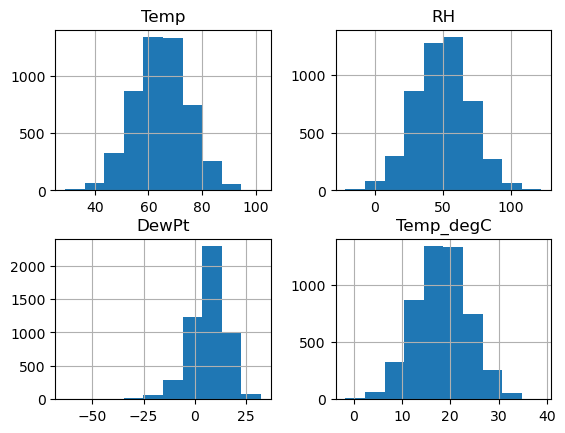

In [18]:
# Pandas also let's us make a few simple plots of data quickly
# and easily. Later we'll explore Matplotlib, the main plotting
# package for Python and what Pandas is usin to make these
# simple plots
# The line below makes simple histograms of the data
example_df.hist()
plt.show() # This just hides various messages from plot creation

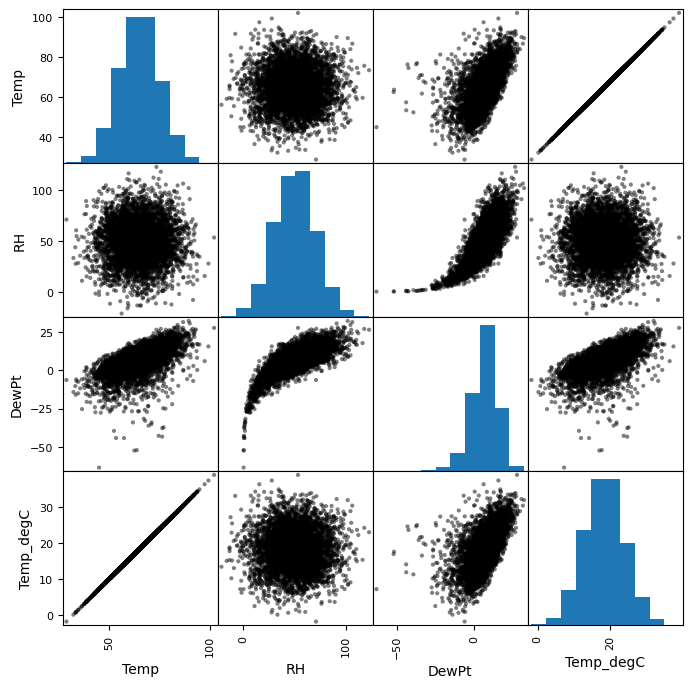

In [19]:
# The line below makes simple scatter plots of the columns
pd.plotting.scatter_matrix(example_df,color = 'k',figsize = (8,8))
plt.show() # This just hides various messages from plot creation

Pandas has lots of plotting functionality and here is a link to how to do various visualizations in Pandas. 

[Link to the documentation here.](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#chart-visualization)

The next package we're going to look at is XArray. Xarray is a package designed to making work with N-dimensional data easier, it is widely used in the atmospheric science field.

The main reason XArray is used widely in our field is that it works well with the netCDF file type, a type of file designed by NCAR meant to store large amounts of data from observations, reanalysis, and climate models easily and efficiently.

We will cover netCDF files in detail in the final workshop. Here we'll introduce basic ideas of how to use XArray and how to look at data with it.

Like how Pandas has Series and Dataframe objects XArray utilizes DataSet and DataArray objects.

In [20]:
# This line downloads a temperature dataset from NCEP
# The National Center for Environmental Prediction
ds = xr.tutorial.load_dataset("air_temperature")

In [21]:
ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [22]:
# Like pandas variables/coordinates in an XArray dataset are accessed by their name
ds['air']

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
         238.59999],
        [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
         239.29999],
        [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
         241.7    ],
        ...,
        [296.6    , 296.19998, 296.4    , ..., 295.4    , 295.1    ,
         294.69998],
        [295.9    , 296.19998, 296.79   , ..., 295.9    , 295.9    ,
         295.19998],
        [296.29   , 296.79   , 297.1    , ..., 296.9    , 296.79   ,
         296.6    ]],

       [[242.09999, 242.7    , 243.09999, ..., 232.     , 233.59999,
         235.79999],
        [243.59999, 244.09999, 244.2    , ..., 231.     , 232.5    ,
         235.7    ],
        [253.2    , 252.89   , 252.09999, ..., 230.79999, 233.39   ,
         238.5    ],
...
        [293.69   , 293.88998, 295.38998, ..., 295.09   , 294.69   ,
         294.29   ],
        [296.29   , 297.19   , 297.59   , ..., 295.29   , 295.09   ,
         294.38998],
        [297.79   , 298.38998, 298.49   , ..., 295.69   , 295.49   ,
         295.19   ]],

       [[245.09   , 244.29   , 243.29   , ..., 241.68999, 241.48999,
         241.79   ],
        [249.89   , 249.29   , 248.39   , ..., 239.59   , 240.29   ,
         241.68999],
        [262.99   , 262.19   , 261.38998, ..., 239.89   , 242.59   ,
         246.29   ],
        ...,
        [293.79   , 293.69   , 295.09   , ..., 295.29   , 295.09   ,
         294.69   ],
        [296.09   , 296.88998, 297.19   , ..., 295.69   , 295.69   ,
         295.19   ],
        [297.69   , 298.09   , 298.09   , ..., 296.49   , 296.19   ,
         295.69   ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [23]:
# data can also be accessed using 'dot' notation
ds.air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
         238.59999],
        [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
         239.29999],
        [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
         241.7    ],
        ...,
        [296.6    , 296.19998, 296.4    , ..., 295.4    , 295.1    ,
         294.69998],
        [295.9    , 296.19998, 296.79   , ..., 295.9    , 295.9    ,
         295.19998],
        [296.29   , 296.79   , 297.1    , ..., 296.9    , 296.79   ,
         296.6    ]],

       [[242.09999, 242.7    , 243.09999, ..., 232.     , 233.59999,
         235.79999],
        [243.59999, 244.09999, 244.2    , ..., 231.     , 232.5    ,
         235.7    ],
        [253.2    , 252.89   , 252.09999, ..., 230.79999, 233.39   ,
         238.5    ],
...
        [293.69   , 293.88998, 295.38998, ..., 295.09   , 294.69   ,
         294.29   ],
        [296.29   , 297.19   , 297.59   , ..., 295.29   , 295.09   ,
         294.38998],
        [297.79   , 298.38998, 298.49   , ..., 295.69   , 295.49   ,
         295.19   ]],

       [[245.09   , 244.29   , 243.29   , ..., 241.68999, 241.48999,
         241.79   ],
        [249.89   , 249.29   , 248.39   , ..., 239.59   , 240.29   ,
         241.68999],
        [262.99   , 262.19   , 261.38998, ..., 239.89   , 242.59   ,
         246.29   ],
        ...,
        [293.79   , 293.69   , 295.09   , ..., 295.29   , 295.09   ,
         294.69   ],
        [296.09   , 296.88998, 297.19   , ..., 295.69   , 295.69   ,
         295.19   ],
        [297.69   , 298.09   , 298.09   , ..., 296.49   , 296.19   ,
         295.69   ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [24]:
# XArray is built on pandas so it inherits a lot of the same features
# This selects all data at 40N, 200E
ds.sel(lat=40,lon = 200)

<xarray.Dataset>
Dimensions:  (time: 2920)
Coordinates:
    lat      float32 40.0
    lon      float32 200.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time) float32 284.6 283.3 282.0 282.8 ... 281.9 282.5 282.1 282.1
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [25]:
# We can also use the slice() function to get values within certain ranges
# This selects data over CONUS
ds.sel(lat=slice(22,50),lon=slice(220,320))

<xarray.Dataset>
Dimensions:  (lat: 0, time: 2920, lon: 41)
Coordinates:
  * lat      (lat) float32 
  * lon      (lon) float32 220.0 222.5 225.0 227.5 ... 312.5 315.0 317.5 320.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [26]:
# We can also use position based indexing
ds.air.data[:,0,0]

array([241.2    , 242.09999, 242.29999, ..., 243.48999, 245.79   ,
       245.09   ], dtype=float32)

In [27]:
# functions called on XArray data can return XArray data-arrays
# This gives us the mean across the entire field for each time step
np.mean(ds.air,axis = (1,2))

<xarray.DataArray 'air' (time: 2920)>
array([274.16626, 273.5202 , 273.23352, ..., 272.99994, 273.0445 ,
       273.41498], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

In [28]:
def convert_K_to_C(temp_data:xr.DataArray) -> xr.DataArray:
    '''
        Converts Kelvin temps stored in an XArray Data Array into
        Degrees Celsius as an XArray Data Array

        Parameters:
            - temp_data (xr.DataArray): The temps in Kelvin to convert
                to Celsius
        
        Outputs:
            - conv_data (xr.DataArray): The temps in Celsius
    '''

    conv_data = temp_data - 273.15

    return conv_data

convert_K_to_C(ds.air)

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[-31.949997, -30.649994, -29.649994, ..., -40.350006,
         -37.649994, -34.550003],
        [-29.350006, -28.649994, -28.449997, ..., -40.350006,
         -37.850006, -33.850006],
        [-23.149994, -23.350006, -24.259995, ..., -39.949997,
         -36.759995, -31.449997],
        ...,
        [ 23.450012,  23.049988,  23.25    , ...,  22.25    ,
          21.950012,  21.549988],
        [ 22.75    ,  23.049988,  23.640015, ...,  22.75    ,
          22.75    ,  22.049988],
        [ 23.140015,  23.640015,  23.950012, ...,  23.75    ,
          23.640015,  23.450012]],

       [[-31.050003, -30.449997, -30.050003, ..., -41.149994,
         -39.550003, -37.350006],
        [-29.550003, -29.050003, -28.949997, ..., -42.149994,
         -40.649994, -37.449997],
        [-19.949997, -20.259995, -21.050003, ..., -42.350006,
         -39.759995, -34.649994],
...
        [ 20.540009,  20.73999 ,  22.23999 , ...,  21.940002,
          21.540009,  21.140015],
        [ 23.140015,  24.040009,  24.440002, ...,  22.140015,
          21.940002,  21.23999 ],
        [ 24.640015,  25.23999 ,  25.339996, ...,  22.540009,
          22.339996,  22.040009]],

       [[-28.059998, -28.86    , -29.86    , ..., -31.460007,
         -31.660004, -31.36    ],
        [-23.259995, -23.86    , -24.759995, ..., -33.559998,
         -32.86    , -31.460007],
        [-10.160004, -10.959991, -11.76001 , ..., -33.259995,
         -30.559998, -26.86    ],
        ...,
        [ 20.640015,  20.540009,  21.940002, ...,  22.140015,
          21.940002,  21.540009],
        [ 22.940002,  23.73999 ,  24.040009, ...,  22.540009,
          22.540009,  22.040009],
        [ 24.540009,  24.940002,  24.940002, ...,  23.339996,
          23.040009,  22.540009]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

In [29]:
# XArray also has very helpful high level functions for grouping together data
# This line gives us the data grouped by seasons (DJF, MAM, JJA, SON) and 
# takes the mean across the seasons all in only a single line!
season_mean = ds.groupby("time.season").mean()
season_mean

<xarray.Dataset>
Dimensions:  (lat: 25, season: 4, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    air      (season, lat, lon) float32 247.0 247.0 246.7 ... 299.4 299.4 299.5
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

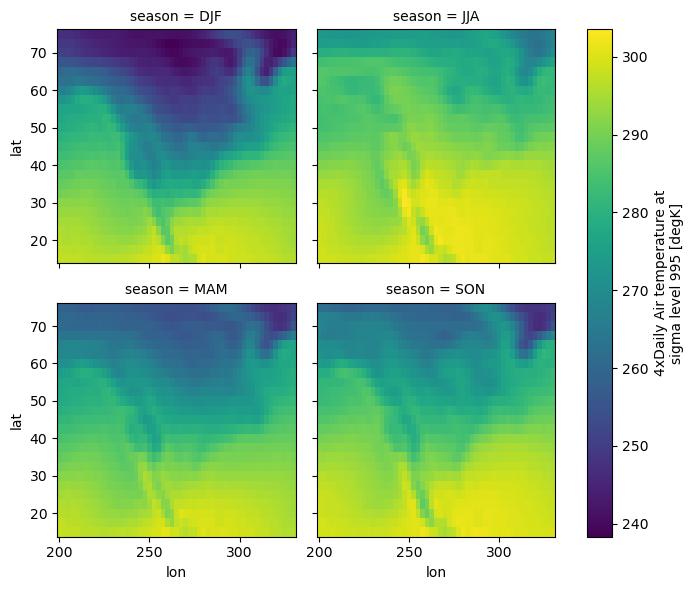

In [30]:
# Like pandas XArray has built in plotting capabilities
season_mean.air.plot(col='season',col_wrap=2)

This is only the surface of XArray, it is an incredibly powerful package and there is lots of stuff you can do with it. I recommend looking through the documentation of XArray and getting a feel for all of the stuff you can do with it. [XArray Documentation](https://docs.xarray.dev/en/stable/index.html)

The final packages we're going to look at are Matplotlib and Cartopy. These are packages designed to help us visualize data and plot data onto maps of the Earth respectively.

We've seen some plotting from Pandas and XArray, both of those are secretly using Matplotlib to make their plots. By using matplotlib directly however we gain more features and customizability than either Pandas or XArray provides

Matplotlib code is verbose compared to Pandas/XArray, this is because it wants you to state what youwant in your plot explicitly. We're to plot some simple data now and slowly introduce the various features of Matplotlib

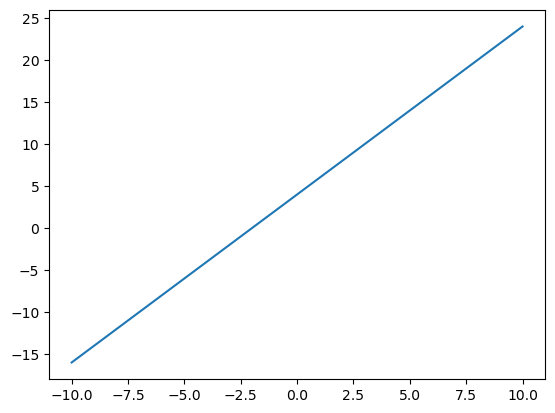

In [31]:
# Generate some simple line data and plot
example_xs = np.linspace(-10,10,20)
example_ys = 2 * example_xs + 4
# These two lines make the plot and shows it
plt.plot(example_xs,example_ys)
plt.show()

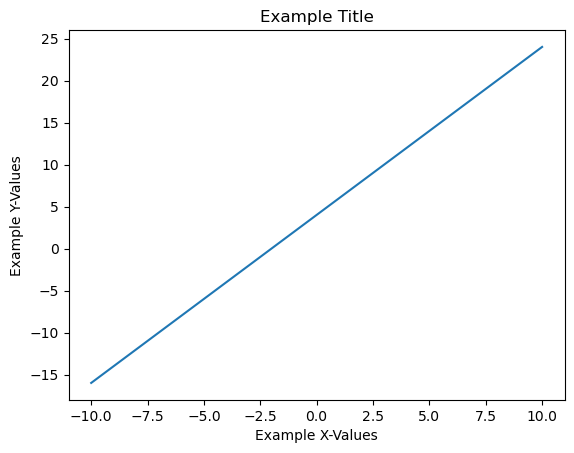

In [32]:
# This plot is really simple looking but it gets the job done
# it shows that our data is linear. Let's spice up the plot though
# and add some more things.
# The first thing we're going to add are labels for our various axes
# as well as a title
plt.plot(example_xs,example_ys)
plt.xlabel('Example X-Values')
plt.ylabel('Example Y-Values')
plt.title('Example Title')
plt.show()

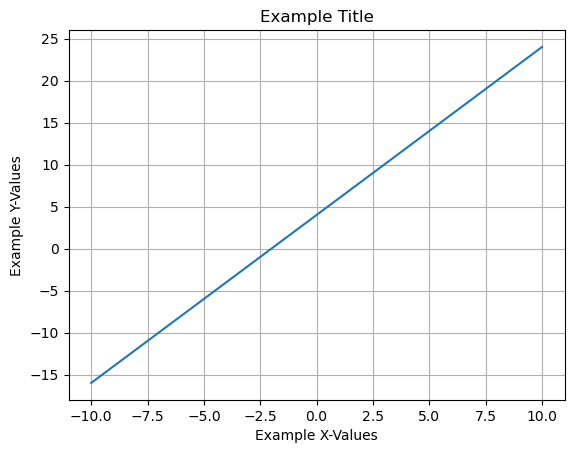

In [33]:
# This plot is a little hard to read, let's add some grid lines so we 
# can see things like the X and Y intercepts
plt.plot(example_xs,example_ys)
plt.xlabel('Example X-Values')
plt.ylabel('Example Y-Values')
plt.title('Example Title')
plt.grid()
plt.show()

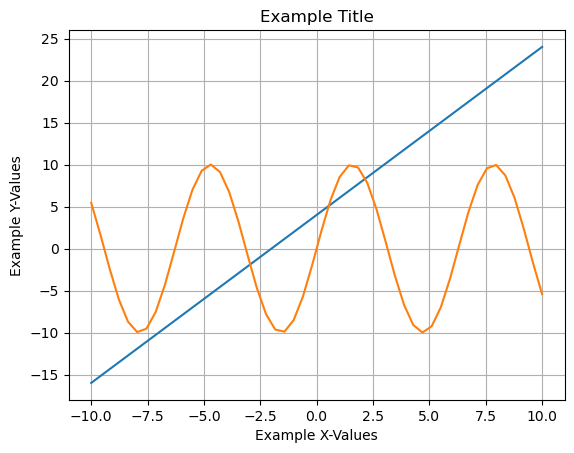

In [34]:
# We can also add other lines to this plot
example_xs2 = np.linspace(-10,10,50)
example_ys2 = 10*np.sin(example_xs2)

plt.plot(example_xs,example_ys)
plt.plot(example_xs2,example_ys2)
plt.xlabel('Example X-Values')
plt.ylabel('Example Y-Values')
plt.title('Example Title')
plt.grid()
plt.show()

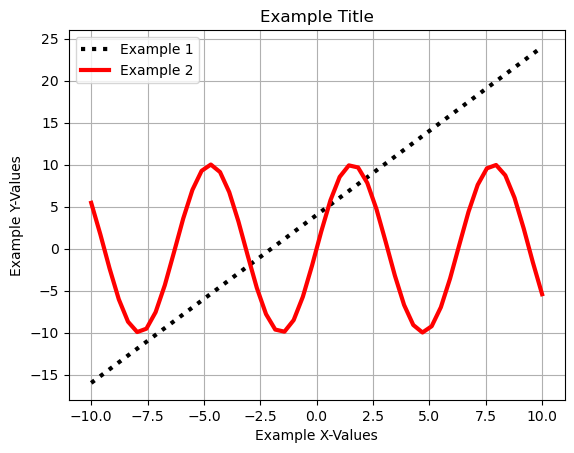

In [35]:
# Let's customize our lines and add a legend

plt.plot(example_xs,example_ys,color = 'k',linestyle = ':',linewidth = 3,label = 'Example 1')
plt.plot(example_xs2,example_ys2,color = 'r',linewidth = 3,label = 'Example 2')
plt.xlabel('Example X-Values')
plt.ylabel('Example Y-Values')
plt.title('Example Title')
plt.grid()
plt.legend(loc = 'best')
plt.show()

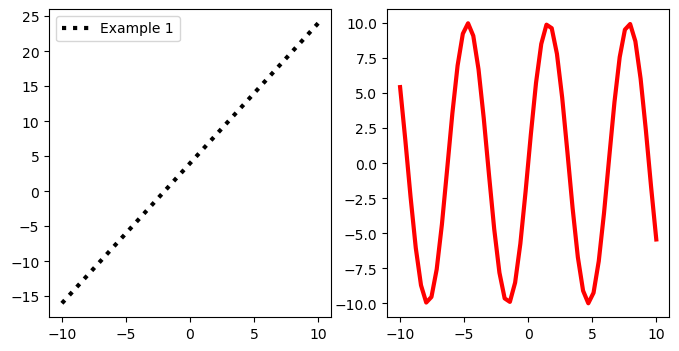

In [36]:
# We can also make multiple plots on the same figure using the plt.subplots() command
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (8,4)) # this makes a 2-figure plot
# Because we're working with subplots we have to interact with the ax variable we just created
# this contains both of the subplots we just made as ax[0] and ax[1]
ax[0].plot(example_xs,example_ys,color = 'k',linestyle = ':',linewidth = 3,label = 'Example 1')
ax[1].plot(example_xs2,example_ys2,color = 'r',linewidth = 3,label = 'Example 2')
# Because the lines were plotted to a specific subplot the other subplot doesn't know they exist
# the legend we add to ax[0] will only have the Example 1 line
ax[0].legend(loc = 'best')
plt.show()

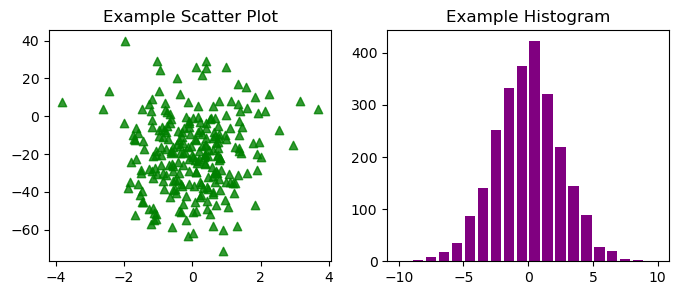

In [37]:
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (8,3)) # this makes a 2-figure plot
#make data for the scatter plot
scatter_ex_xs = np.random.normal(0,1,250) # this makes normally distributed data
scatter_ex_ys = np.random.normal(-20,20,250)
hist_ex = np.random.normal(0,2.5,2500)
# the .scatter() method makes a scatter plot
ax[0].scatter(scatter_ex_xs,scatter_ex_ys,color = 'Green',marker = '^',alpha = 0.8)
# the .hist() method makes a histogram
ax[1].hist(hist_ex,color = 'Purple',rwidth = 0.8,bins = np.arange(-10,11,1))
# Becuase we're working with axes objects we have to use .set_title() instead of .title()
ax[0].set_title('Example Scatter Plot')
ax[1].set_title('Example Histogram')
plt.show()

That was a simple line plot. A lot of our data has geographic components to it let's make some plots of variables on the earth using the data we got earlier.

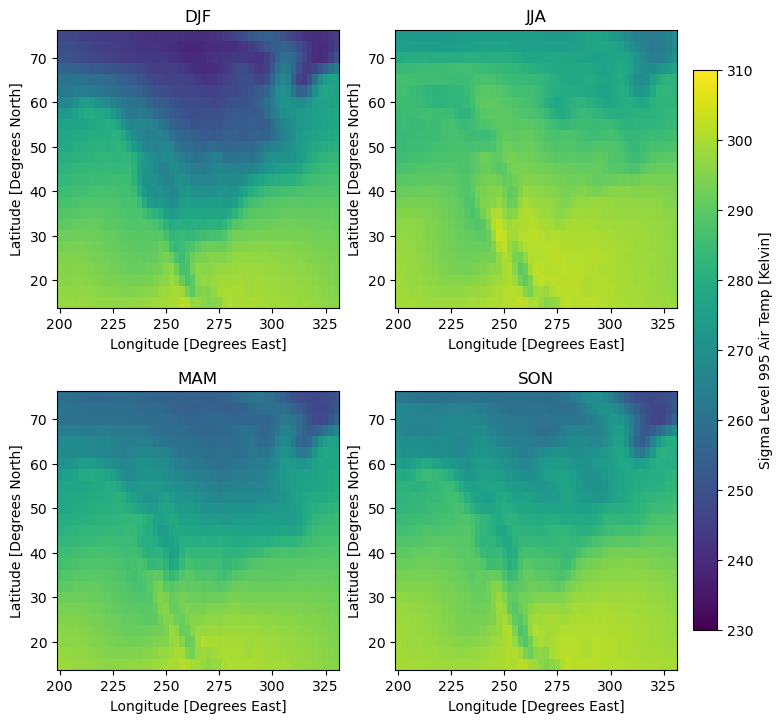

In [38]:
# This code makes a four-panel plot similar to the seasonal mean one that XArray
# generated for us automatically, notice that it takes decently more than 1 line

# This makes the base of our figure as a collection of sub-plots
fig,ax = plt.subplots(nrows = 2, ncols = 2,figsize = (8,8)) # this makes a 2x2 plot that is 8 inches x 8 inches in size
# These are various parameters for our plot that we want
cmin = 230
cmax = 310

# These are the actual plots
pc0 = ax[0,0].pcolormesh(season_mean.lon,season_mean.lat,season_mean.air[0,:,:],vmin = cmin,vmax = cmax)
pc1 = ax[0,1].pcolormesh(season_mean.lon,season_mean.lat,season_mean.air[1,:,:],vmin = cmin,vmax = cmax)
pc2 = ax[1,0].pcolormesh(season_mean.lon,season_mean.lat,season_mean.air[2,:,:],vmin = cmin,vmax = cmax)
pc3 = ax[1,1].pcolormesh(season_mean.lon,season_mean.lat,season_mean.air[3,:,:],vmin = cmin,vmax = cmax)

# This makes a colorbar axis, and adds it to the plot
cax = fig.add_axes([0.92,0.15,0.03,0.7])
cbar = plt.colorbar(pc0,cax=cax,label = 'Sigma Level 995 Air Temp [Kelvin]')

# This modifies the spacing of our plots
plt.subplots_adjust(hspace = 0.3,wspace = 0.2,top = 0.9,bottom = 0.1)

# This adds labels to our various plots, and sets the X/Y ticks
for row in ax:
    for item in row:
        item.set_xlabel('Longitude [Degrees East]')
        item.set_ylabel('Latitude [Degrees North]')

# Sets the title for the plots
ax[0,0].set_title('DJF')
ax[0,1].set_title('JJA')
ax[1,0].set_title('MAM')
ax[1,1].set_title('SON')

# Call plt.show() to suppress outputs from the final method call
plt.show()

While that took several more lines than the single line we used with XArray we can also start customizing this plot and adding features that make it more meaningful/useful to look at. The first thing we're going to add our geographic features/borders with CartoPy

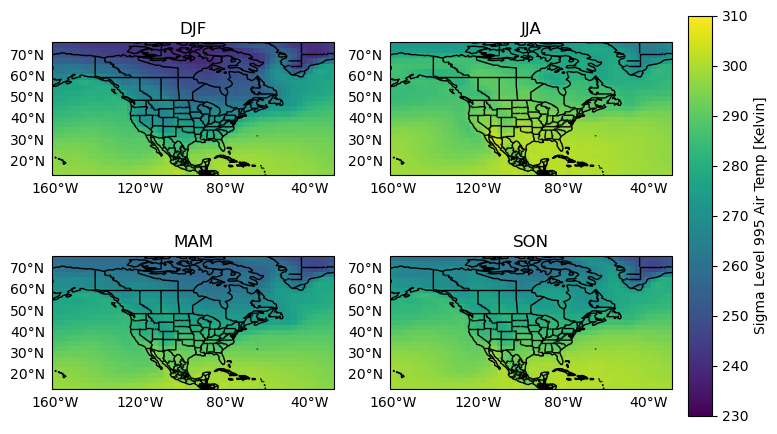

In [39]:
# This code makes a four-panel plot similar to the seasonal mean one that XArray
# generated for us automatically, notice that it takes decently more than 1 line

# This makes the base of our figure as a collection of sub-plots
fig,ax = plt.subplots(nrows = 2, ncols = 2,figsize = (8,8),subplot_kw={'projection':ccrs.PlateCarree()}) # this makes a 2x2 plot that is 8 inches x 8 inches in size
# These are various parameters for our plot that we want
cmin = 230
cmax = 310

# These are the actual plots
pc0 = ax[0,0].pcolormesh(season_mean.lon,season_mean.lat,season_mean.air[0,:,:],vmin = cmin,vmax = cmax)
pc1 = ax[0,1].pcolormesh(season_mean.lon,season_mean.lat,season_mean.air[1,:,:],vmin = cmin,vmax = cmax)
pc2 = ax[1,0].pcolormesh(season_mean.lon,season_mean.lat,season_mean.air[2,:,:],vmin = cmin,vmax = cmax)
pc3 = ax[1,1].pcolormesh(season_mean.lon,season_mean.lat,season_mean.air[3,:,:],vmin = cmin,vmax = cmax)

# This makes a colorbar axis, and adds it to the plot
cax = fig.add_axes([0.92,0.25,0.03,0.5])
cbar = plt.colorbar(pc0,cax=cax,label = 'Sigma Level 995 Air Temp [Kelvin]')

# This modifies the spacing of our plots
plt.subplots_adjust(hspace = -0.5,wspace = 0.2,top = 0.9,bottom = 0.1)

# This adds labels to our various plots, and sets the X/Y ticks
for row in ax:
    for item in row:
        item.set_xlabel('Longitude [Degrees West]')
        item.set_ylabel('Latitude [Degrees North]')
        gl = item.gridlines(crs = ccrs.PlateCarree(),draw_labels = True,)
        gl.xlines = False
        gl.ylines = False
        gl.top_labels = False
        gl.right_labels = False
        gl.xlocator = mticker.FixedLocator([-160,-120,-80,-40])
        item.coastlines()
        # Adds country borders
        item.add_feature(cfeature.BORDERS)
        # Adds Country subdivisions (e.g. States/Provinces)
        item.add_feature(cfeature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='10m', facecolor='none', edgecolor='k'))


# Sets the title for the plots
ax[0,0].set_title('DJF')
ax[0,1].set_title('JJA')
ax[1,0].set_title('MAM')
ax[1,1].set_title('SON')
# Call plt.show() to suppress outputs from the final method call
plt.show()

This plot is more readable, we can see what the air temp is over land vs ocean, and in specific locations much easier. Now let's zoom in on the US.

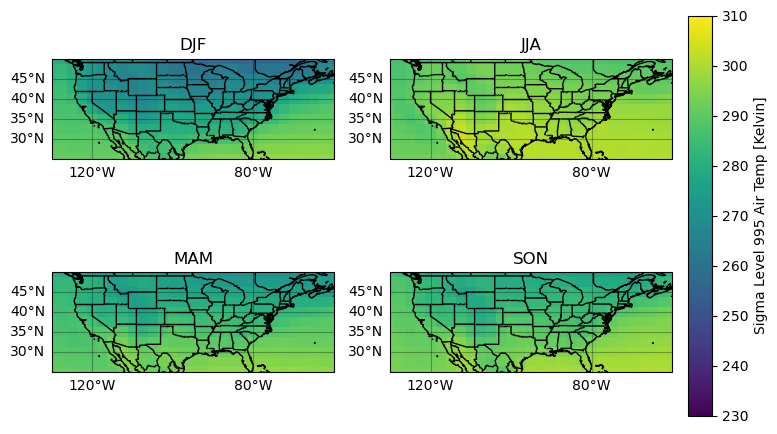

In [40]:
# This code makes a four-panel plot similar to the seasonal mean one that XArray
# generated for us automatically, notice that it takes decently more than 1 line

# This makes the base of our figure as a collection of sub-plots
fig,ax = plt.subplots(nrows = 2, ncols = 2,figsize = (8,8),subplot_kw={'projection':ccrs.PlateCarree()}) # this makes a 2x2 plot that is 8 inches x 8 inches in size
# These are various parameters for our plot that we want
cmin = 230
cmax = 310

# These are the actual plots
pc0 = ax[0,0].pcolormesh(season_mean.lon,season_mean.lat,season_mean.air[0,:,:],vmin = cmin,vmax = cmax)
pc1 = ax[0,1].pcolormesh(season_mean.lon,season_mean.lat,season_mean.air[1,:,:],vmin = cmin,vmax = cmax)
pc2 = ax[1,0].pcolormesh(season_mean.lon,season_mean.lat,season_mean.air[2,:,:],vmin = cmin,vmax = cmax)
pc3 = ax[1,1].pcolormesh(season_mean.lon,season_mean.lat,season_mean.air[3,:,:],vmin = cmin,vmax = cmax)

# This makes a colorbar axis, and adds it to the plot
cax = fig.add_axes([0.92,0.25,0.03,0.5])
cbar = plt.colorbar(pc0,cax=cax,label = 'Sigma Level 995 Air Temp [Kelvin]')

# This modifies the spacing of our plots
plt.subplots_adjust(hspace = -0.5,wspace = 0.2,top = 0.9,bottom = 0.1)

# This adds labels to our various plots, and sets the X/Y ticks
for row in ax:
    for item in row:
        item.set_xlabel('Longitude [Degrees West]')
        item.set_ylabel('Latitude [Degrees North]')
        gl = item.gridlines(crs = ccrs.PlateCarree(),draw_labels = True,color = 'k',alpha = 0.3)
        gl.top_labels = False
        gl.right_labels = False
        gl.xlocator = mticker.FixedLocator([-160,-120,-80,-40])
        item.coastlines()
        # Adds country borders
        item.add_feature(cfeature.BORDERS)
        # Adds Country subdivisions (e.g. States/Provinces)
        item.add_feature(cfeature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='10m', facecolor='none', edgecolor='k'))
        # These lines zoom us in onto the US
        item.set_xlim(-130,-60)
        item.set_ylim(25,50)


# Sets the title for the plots
ax[0,0].set_title('DJF')
ax[0,1].set_title('JJA')
ax[1,0].set_title('MAM')
ax[1,1].set_title('SON')

# Call plt.show() to suppress outputs from the final method call
plt.show()

In [41]:
season_mean

<xarray.Dataset>
Dimensions:  (lat: 25, season: 4, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    air      (season, lat, lon) float32 247.0 247.0 246.7 ... 299.4 299.4 299.5
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

Now let's change the colorbar to make the temperature variations easier to see. Matplotlib has lots of color options, as well as the ability to make your own colormap. [This is a list of the default colorbar options for Matplotlib](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

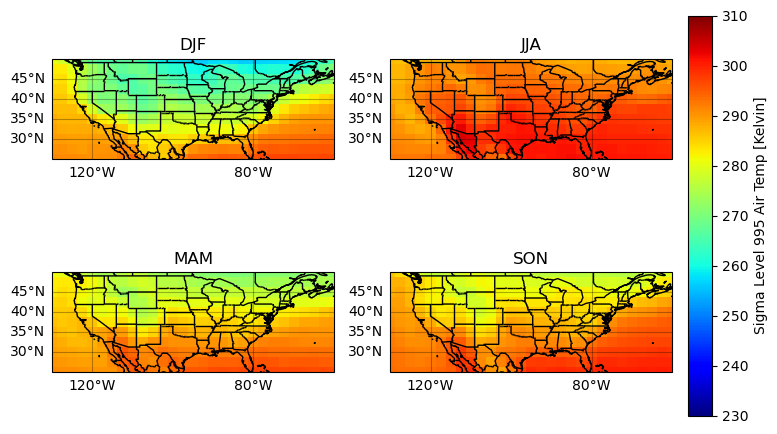

In [42]:
# This code makes a four-panel plot similar to the seasonal mean one that XArray
# generated for us automatically, notice that it takes decently more than 1 line

# This makes the base of our figure as a collection of sub-plots
fig,ax = plt.subplots(nrows = 2, ncols = 2,figsize = (8,8),subplot_kw={'projection':ccrs.PlateCarree()}) # this makes a 2x2 plot that is 8 inches x 8 inches in size
# These are various parameters for our plot that we want
cmin = 230
cmax = 310
cmap = 'jet'

# These are the actual plots
pc0 = ax[0,0].pcolormesh(season_mean.lon,season_mean.lat,season_mean.air[0,:,:],vmin = cmin,vmax = cmax,cmap = 'jet')
pc1 = ax[0,1].pcolormesh(season_mean.lon,season_mean.lat,season_mean.air[1,:,:],vmin = cmin,vmax = cmax,cmap = 'jet')
pc2 = ax[1,0].pcolormesh(season_mean.lon,season_mean.lat,season_mean.air[2,:,:],vmin = cmin,vmax = cmax,cmap = 'jet')
pc3 = ax[1,1].pcolormesh(season_mean.lon,season_mean.lat,season_mean.air[3,:,:],vmin = cmin,vmax = cmax,cmap = 'jet')

# This makes a colorbar axis, and adds it to the plot
cax = fig.add_axes([0.92,0.25,0.03,0.5])
cbar = plt.colorbar(pc0,cax=cax,label = 'Sigma Level 995 Air Temp [Kelvin]')

# This modifies the spacing of our plots
plt.subplots_adjust(hspace = -0.5,wspace = 0.2,top = 0.9,bottom = 0.1)

# This adds labels to our various plots, and sets the X/Y ticks
for row in ax:
    for item in row:
        item.set_xlabel('Longitude [Degrees West]')
        item.set_ylabel('Latitude [Degrees North]')
        gl = item.gridlines(crs = ccrs.PlateCarree(),draw_labels = True,color = 'k',alpha = 0.3)
        gl.top_labels = False
        gl.right_labels = False
        gl.xlocator = mticker.FixedLocator([-160,-120,-80,-40])
        item.coastlines()
        # Adds country borders
        item.add_feature(cfeature.BORDERS)
        # Adds Country subdivisions (e.g. States/Provinces)
        item.add_feature(cfeature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='10m', facecolor='none', edgecolor='k'))
        # These lines zoom us in onto the US
        item.set_xlim(-130,-60)
        item.set_ylim(25,50)


# Sets the title for the plots
ax[0,0].set_title('DJF')
ax[0,1].set_title('JJA')
ax[1,0].set_title('MAM')
ax[1,1].set_title('SON')

# Call plt.show() to suppress outputs from the final method call
plt.show()

In the examples above we have been using the Plate Carree map projection but there are others. The example below initializes the plots with two different map projections to show how this impacts the appearance of the plots. Map projections carry a lot of calculations behind the scenes and can sometimes make plotting slow.

This is only a very small subset of possible map projections with cartopy, you can even make custom projection if you wanted to. As for which projection is best that is entirely dependent upon your data and what you're plotting. I recommend you use what projection your advisor or other group members recommend.

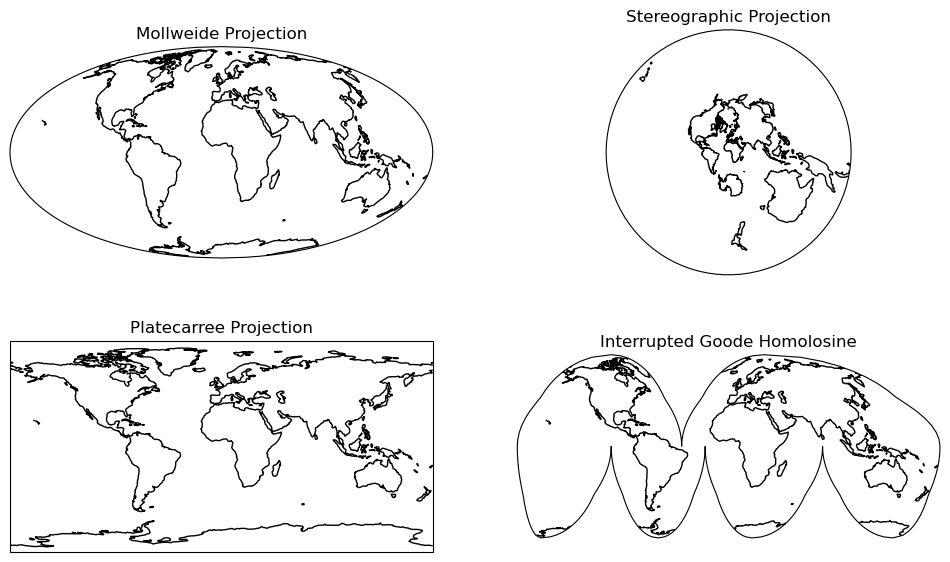

In [43]:
# Initialize the figure
fig = plt.figure(figsize = (12, 7))
# add subplots to the figure with our desired projections
# Mollweide Projection
ax00 = plt.subplot(2,2,1,projection=ccrs.Mollweide())
ax00.coastlines()
ax00.set_title('Mollweide Projection')
# Stereographic
ax01 = plt.subplot(2,2,2,projection=ccrs.Stereographic())
ax01.coastlines()
ax01.set_title('Stereographic Projection')
# Platecarreee
ax10 = plt.subplot(2,2,3,projection=ccrs.PlateCarree())
ax10.coastlines()
ax10.set_title('Platecarree Projection')
# Interrupted Goode Homolosine
ax11 = plt.subplot(2,2,4,projection=ccrs.InterruptedGoodeHomolosine())
ax11.coastlines()
ax11.set_title('Interrupted Goode Homolosine')

plt.show()

Congrats! You have now covered the basics of Pandas, XArray, Matplotlib, and Cartopy! The next notebook contains a few examples for us to work through together.